In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import scatterplotmatrix
from mlxtend.plotting import heatmap
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

In [2]:
#pull the clean data
df = pd.read_csv('data_cleaned.csv')

In [3]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8.0,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4.0,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7.0,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10.0,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2.0,0,73.0,0


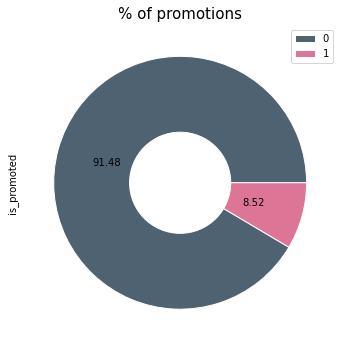

In [4]:
#Donut chart
colors = ['#4F6272', '#DD7596']
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 5))
df.is_promoted.value_counts().plot(kind='pie', labels=None, autopct='%.2f', ax=ax1, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, colors=colors).legend(labels={
                     1,0})
central_circle = plt.Circle((0, 0), 0.4, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title('% of promotions', size=15)
plt.tight_layout()
plt.savefig('images/donut_chart.png')
plt.show()

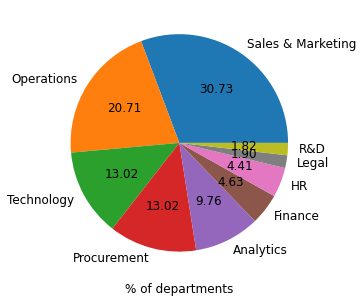

In [5]:
#Categorical columns
#Pie chart for 'department' column
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 5))
df.department.value_counts().plot(kind='pie',label='', autopct='%.2f', ax=ax1)
ax1.set_xlabel('% of departments', size=12)
plt.savefig('images/department_piechart.png')
plt.show()

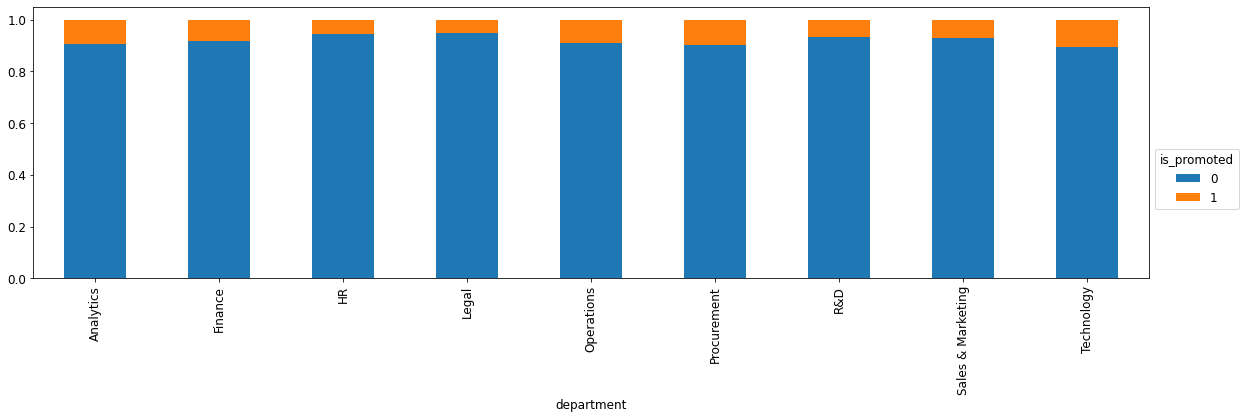

In [6]:
#Percentage of people who got promoted from each department
plt.rcParams['figure.figsize'] = [20, 5]
ct = pd.crosstab(df.department,df.is_promoted,normalize='index')
ct.plot.bar(stacked=True)
plt.legend(title='is_promoted',bbox_to_anchor=(1,0.5))
plt.savefig('images/recruitment_channel_percentage')

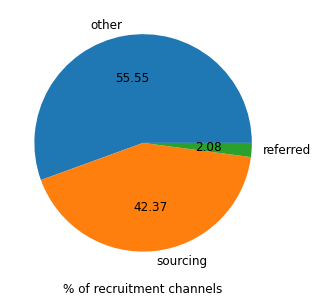

In [7]:
#Pie chart for 'recruitment_channel' column
fig, (ax1) = plt.subplots(ncols=1, figsize=(20, 5))
df.recruitment_channel.value_counts().plot(kind='pie',label='', autopct='%.2f', ax=ax1)
ax1.set_xlabel('% of recruitment channels', size=12)
plt.savefig('images/recruitment_channel_piechart.png')
plt.show()

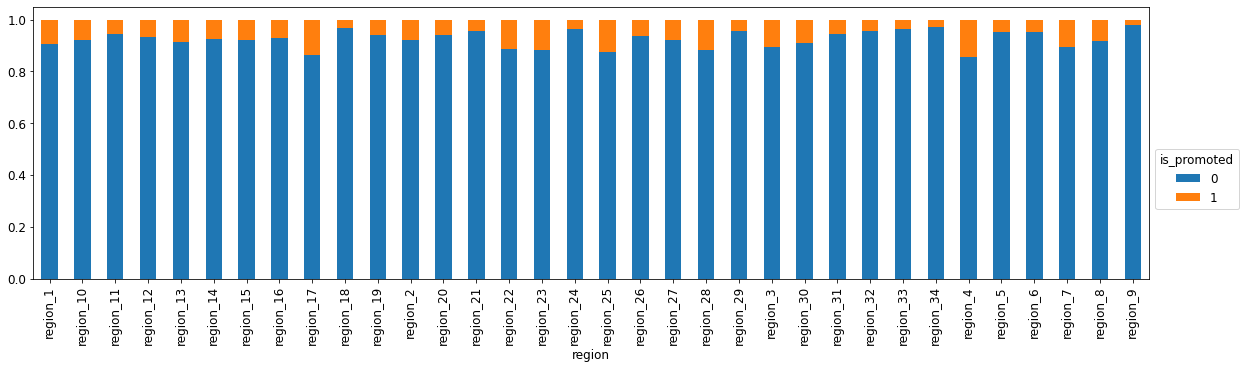

In [8]:
#Dist of promotions across all the regions
reg = pd.crosstab(df.region,df.is_promoted,normalize='index')
reg.plot.bar(stacked=True)
plt.legend(title='is_promoted',bbox_to_anchor=(1,0.5))
plt.savefig('images/recruitment_channel_dist.png')

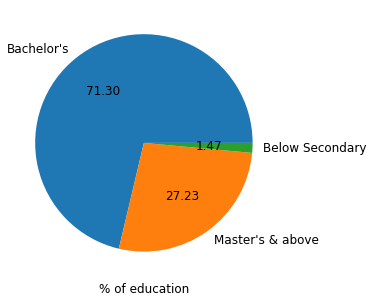

In [9]:
#Pie chart for 'education' column
fig, (ax1) = plt.subplots(ncols=1, figsize=(20, 5))
df.education.value_counts().plot(kind='pie',label='', autopct='%.2f', ax=ax1)
ax1.set_xlabel('% of education', size=12)
plt.savefig('images/education_piechart.png')
plt.show()

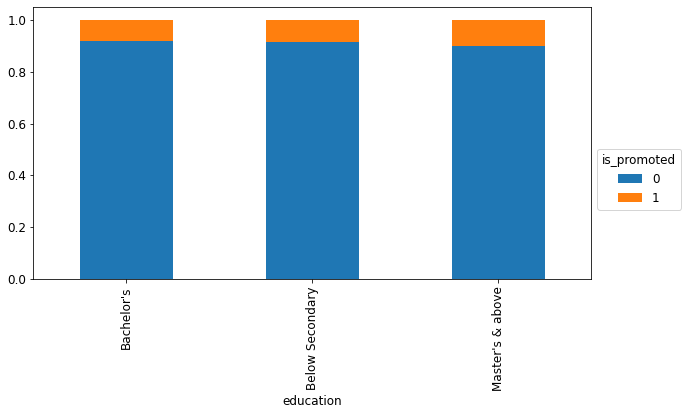

In [14]:
#Distribution of promotions among people with different Educational backgrounds
plt.rcParams['figure.figsize'] = [10, 5]
edu = pd.crosstab(df.education,df.is_promoted,normalize='index')
edu.plot.bar(stacked=True)
plt.rcParams['figure.figsize'] = [20, 5]
plt.legend(title='is_promoted',bbox_to_anchor=(1,0.5))
plt.savefig('images/education_dist.png')

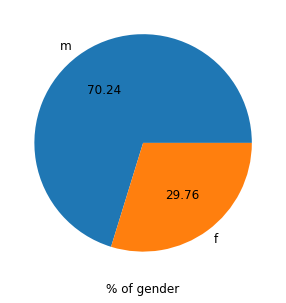

In [11]:
#Pie chart for 'gender' column
fig, (ax1) = plt.subplots(ncols=1, figsize=(20, 5))
df.gender.value_counts().plot(kind='pie',label='', autopct='%.2f', ax=ax1)
ax1.set_xlabel('% of gender', size=12)
plt.savefig('images/gender_piechart.png')
plt.show()

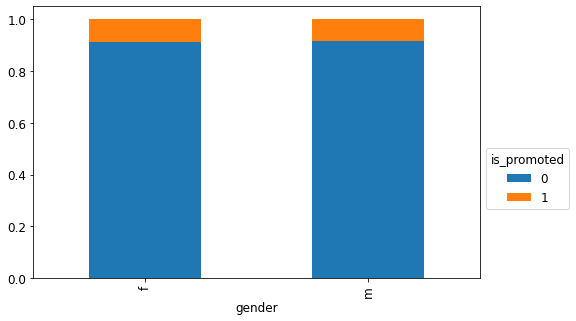

In [15]:
#Dist of promotions across genders
plt.rcParams['figure.figsize'] = [8, 5]
gender = pd.crosstab(df.gender,df.is_promoted,normalize='index')
gender.plot.bar(stacked=True)
plt.legend(title='is_promoted',loc='upper left',bbox_to_anchor=(1, 0.5))
plt.savefig('images/gender_dist.png')

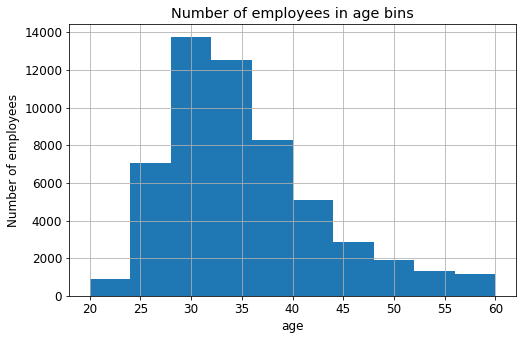

In [16]:
#Bar graph for age
df.age.hist()
plt.title("Number of employees in age bins")
plt.xlabel("age")
plt.ylabel("Number of employees")
plt.savefig('images/age.png')
plt.show()

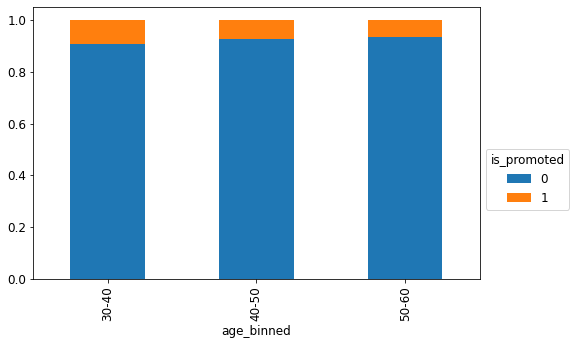

In [17]:
#Distribution of promotion ratios with respect to age
plt.rcParams['figure.figsize'] = [8, 5]
age_bins = [20,30,40,50,60]
age_labels = ['20-30','30-40','40-50','50-60']
bins = [30,40,50,60,70,80,90,100]
labels = ['30-40','40-50','50-60','60-70','70-80','80-90','90-100']
df['age_binned'] = pd.cut(df['age'], bins=bins, labels=labels)
df['age_binned'].value_counts()
age_bin = pd.crosstab(df.age_binned,df.is_promoted,normalize='index')
age_bin.plot.bar(stacked=True)
plt.rcParams['figure.figsize'] = [5, 5]
plt.legend(title='is_promoted',loc='upper left',bbox_to_anchor=(1, 0.5))
plt.savefig('images/age_dist.png', dpi=300)

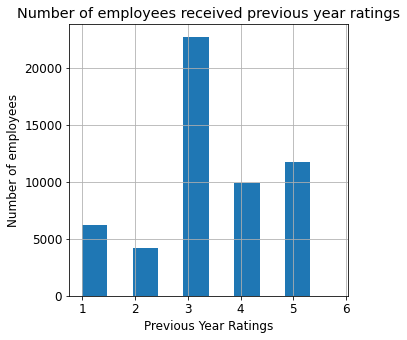

In [18]:
#Bar graph for 'previous_year_rating'
df.previous_year_rating.hist()
plt.title("Number of employees received previous year ratings")
plt.xlabel("Previous Year Ratings")
plt.ylabel("Number of employees")
plt.savefig('images/previous_year_ratings.png')
plt.show()

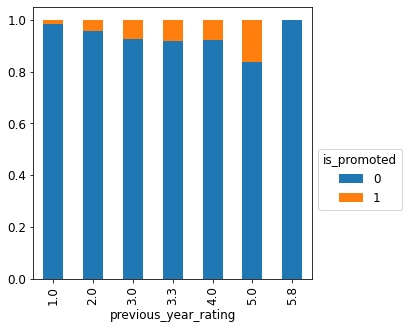

In [19]:
#Difference in the percentage of promoted employees with respect to previous year ratings
rating = pd.crosstab(df.previous_year_rating,df.is_promoted,normalize='index')
rating.plot.bar(stacked=True)
plt.legend(title='is_promoted',loc='upper left',bbox_to_anchor=(1, 0.5))
plt.savefig('images/previous_year_ratings_dist.png', dpi=300)